<h1>LP-3: ML Mini-Project</h1>

<b> Group Members: </b>
- 41108: Medha Badamikar
- 41117: Udayan Chavan
- 41122: Tejas Deshpande

Build a machine learning model that predicts the type of people who survived the Titanic shipwreck using passenger data (Age, Gender, Socio-Economic class)

Importing all required dependencies 

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

Reading the CSV file into a data frame

In [2]:
titanic_data = pd.read_csv('train.csv')
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<h2>Preprocessing</h2>

Checking for empty cells

In [3]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
# Drop cabin column
titanic_data = titanic_data.drop(columns='Cabin', axis=1)
# Replace missing values in Age by mean value
titanic_data['Age'].fillna(titanic_data['Age'].mean(), inplace=True)

# Can't take mean of Embarked, replacing missing values by mode
print(titanic_data['Embarked'].mode())

titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)

0    S
dtype: object


Rechecking for missing values

In [5]:
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Reducing overall volume of dataframe

In [6]:
len(titanic_data)

891

In [7]:
titanic_data = titanic_data.iloc[:400,]

In [8]:
len(titanic_data)

400

<h2>Visualizing the available data</h2>

<AxesSubplot:xlabel='Survived', ylabel='Age'>

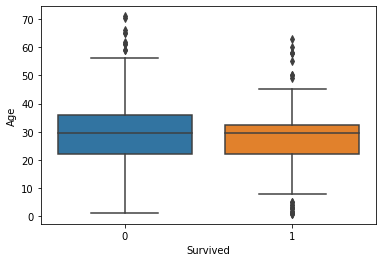

In [9]:
sns.boxplot(data=titanic_data, x="Survived", y="Age")

<AxesSubplot:xlabel='count', ylabel='Survived'>

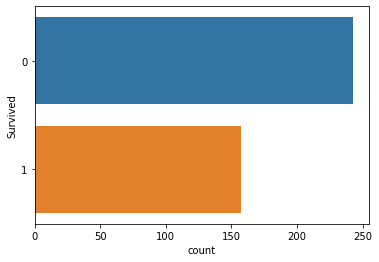

In [10]:
sns.countplot(data=titanic_data, y="Survived")

<h2>Transforming into Categorical values</h2>

In [11]:
titanic_data.replace({'Sex':{'male':0,'female':1}}, inplace=True)

In [12]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S


<h2>Splitting data into feature and target variables</h2>

In [13]:
# Remove unnecessary columns
X = titanic_data.drop(columns = ['PassengerId','Name','Ticket','Survived','SibSp','Parch','Fare', 'Embarked'],axis=1)
Y = titanic_data['Survived']

Splitting dataset into Training and Testing in 80:20 <br>
<b>X_train:</b> set of values from variable x <br>
<b>Y_train:</b> output (alive/dead) for data from variable x <br>
(Similar for X_test and Y_test)

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

In [15]:
print(X_train)

     Pclass  Sex        Age
205       3    1   2.000000
354       3    0  29.699118
3         1    1  35.000000
264       3    1  29.699118
194       1    1  44.000000
..      ...  ...        ...
299       1    1  50.000000
22        3    1  15.000000
72        2    0  21.000000
15        2    1  55.000000
168       1    0  29.699118

[320 rows x 3 columns]


In [16]:
print(Y_train)

205    0
354    0
3      1
264    0
194    1
      ..
299    1
22     1
72     0
15     1
168    0
Name: Survived, Length: 320, dtype: int64


<h2> Creating a Logistic Regression Model </h2>

In [17]:
model = LogisticRegression()

In [18]:
model.fit(X_train, Y_train)

LogisticRegression()

Creating a variable to store predictions

In [19]:
X_train_prediction = model.predict(X_train)

Checking accuracy of predictions

In [20]:
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print('Accuracy score of training data : ', training_data_accuracy)

Accuracy score of training data :  0.83125


Checking accuracy with the test data

In [21]:
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print('Accuracy score of test data : ', test_data_accuracy)

Accuracy score of test data :  0.7875


<h2>Checking for a random person</h2>

In [22]:
random_person = (3,1,85)
input_as_array = np.asarray(random_person)
print(input_as_array)

[ 3  1 85]


Reshaping values to match our model

In [23]:
reshaped_input_as_array = input_as_array.reshape(1,-1)

In [24]:
print(reshaped_input_as_array)

[[ 3  1 85]]


In [25]:
prediction = model.predict(reshaped_input_as_array)

if prediction[0]==0:
    print("Dead")
if prediction[0]==1:
    print("Alive")

Dead
